In [5]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import seaborn as sns
import time

In [6]:
# Load the trained randomForest pipeline
svmModel = joblib.load('svm.joblib')

# Load test dataset
test_df = pd.read_csv("../../../data/test_data.csv")

# Predict using raw text
X_test = test_df["text"].astype(str)
y_true = test_df["Analysis"]

# Initialize time for recording inference time
start = time.time()

# Predict
y_pred = svmModel.predict(X_test)

end = time.time()
inference_time = end - start

# Save inference time to CSV
df = pd.read_csv("computation_time_svm.csv") 

df["svm_InferenceTime (s)"] = inference_time

df.to_csv("computation_time_svm.csv", index=False)

print("Inference time: ", inference_time, "seconds")
print("Inference time is saved")

Inference time:  1.979017972946167 seconds
Inference time is saved


In [7]:
# Calculate accuracy
acc = accuracy_score(y_true, y_pred)
rounded_acc = round(acc, 4) # Round accuracy to 4 decimal places
print("Overall Accuracy:", rounded_acc)

accuracy_df = pd.DataFrame([{"Metric": "Overall Accuracy", "Score": rounded_acc}])
accuracy_df.to_csv("overall_accuracy_svm.csv", index=False) # Save overall accuracy to CSV

Overall Accuracy: 0.7559


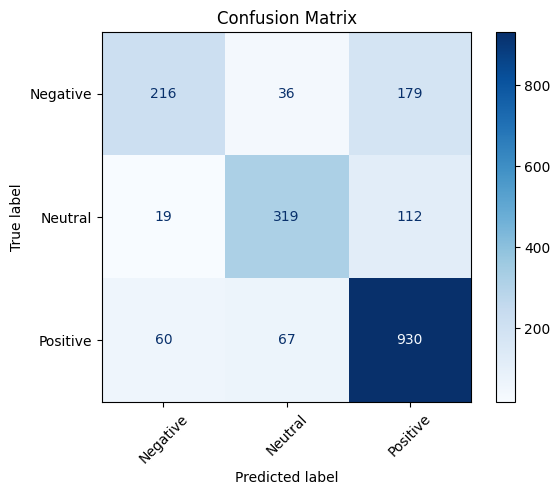

In [8]:
# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=svmModel.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svmModel.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix_svm.png")
plt.show()

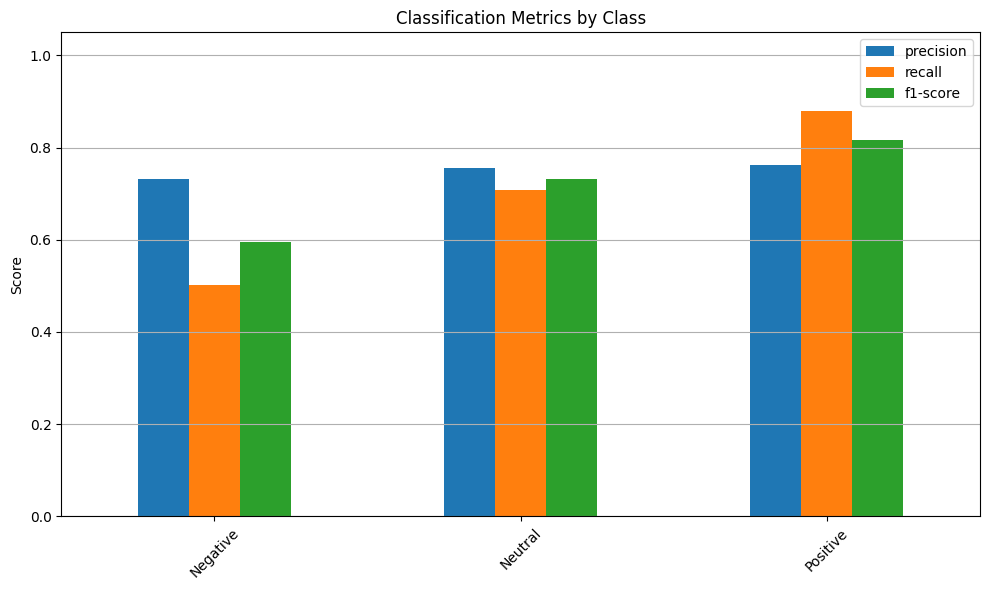

In [9]:
# Generate classification report
report_dict = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Store to csv
report_df.drop(['accuracy', 'macro avg', 'weighted avg'], inplace=True)
report_df[['precision', 'recall', 'f1-score']].to_csv("classification_report_svm.csv") # Save classification report to CSV

# Plot precision, recall, f1-score per class
report_df[['precision', 'recall', 'f1-score']].plot.bar(figsize=(10,6))
plt.title("Classification Metrics by Class")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("classification_report_svm.png")
plt.show()

